# UNDERSTANDING FBPROPHET

In [1]:
# MODEL DOCUMENTATION : https://facebook.github.io/prophet/docs
!pip install prophet
!pip install pystan
import pandas as pd
from prophet import Prophet

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\MARVIN\AppData\Local\Temp\pip-install-qutp2q2t\pystan_123ae70a56e948a19a827308f8395c0b\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py)

In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')

In [3]:
df.head(10)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [4]:
df.tail(10)

,ds,y
2895,2016-01-11,8.470730
2896,2016-01-12,8.135054
2897,2016-01-13,8.067149
2898,2016-01-14,8.023552
2899,2016-01-15,8.021913
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [5]:
df.shape

(2905, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [11]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


# THE MODEL

In [12]:
# Instantiate the model
model = Prophet()

In [13]:
# train the model
model.fit(df)

11:16:15 - cmdstanpy - INFO - Chain [1] start processing
11:16:16 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# make some predictions using the ds column ~ use the make_future_dataframe method to generate future ds values
future = model.make_future_dataframe(periods=365)

In [15]:
future.tail(5)

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [16]:
# making predictions
future = model.predict(future)

# the predict method will assign each future column a predicted value 'yhat' with uncertainty intervals
future.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.034651,8.202092,9.465292,8.034651,8.034651,0.803099,0.803099,0.803099,0.352283,0.352283,0.352283,0.450816,0.450816,0.450816,0.0,0.0,0.0,8.837750
1,2007-12-11,8.033123,7.985912,9.157822,8.033123,8.033123,0.553199,0.553199,0.553199,0.119616,0.119616,0.119616,0.433583,0.433583,0.433583,0.0,0.0,0.0,8.586321
2,2007-12-12,8.031595,7.728133,8.972845,8.031595,8.031595,0.350636,0.350636,0.350636,-0.066649,-0.066649,-0.066649,0.417284,0.417284,0.417284,0.0,0.0,0.0,8.382230
3,2007-12-13,8.030067,7.737547,8.982094,8.030067,8.030067,0.330082,0.330082,0.330082,-0.072283,-0.072283,-0.072283,0.402365,0.402365,0.402365,0.0,0.0,0.0,8.360149
4,2007-12-14,8.028539,7.732856,8.929025,8.028539,8.028539,0.319666,0.319666,0.319666,-0.069565,-0.069565,-0.069565,0.389230,0.389230,0.389230,0.0,0.0,0.0,8.348204


In [17]:
future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
3267,2017-01-17,8.318985,7.587004,9.023030
3268,2017-01-18,8.151637,7.429690,8.899119
3269,2017-01-19,8.163528,7.478145,8.863404


# VISUALIZATION

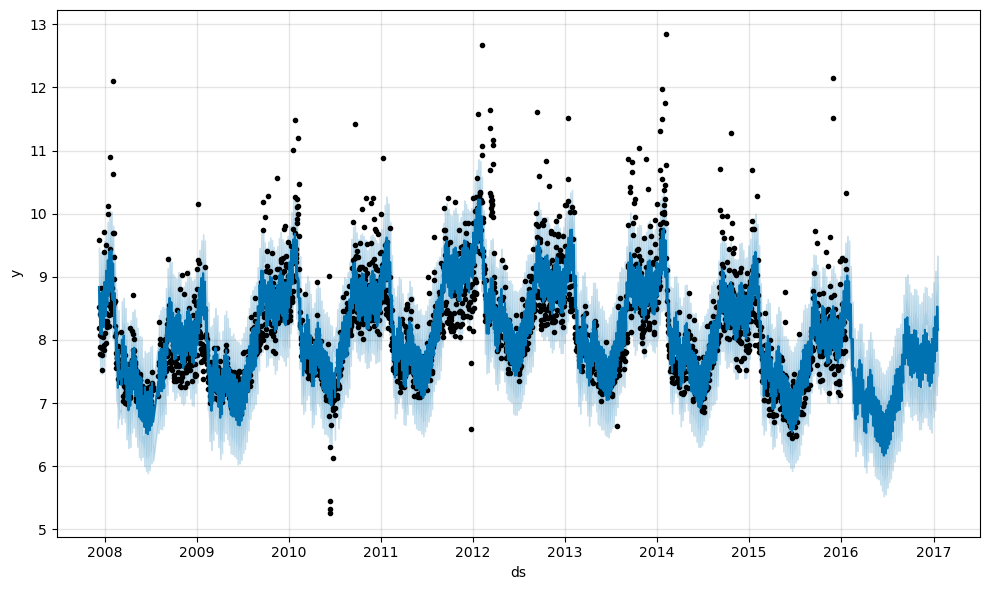

In [18]:
# plot the predicted values
figure_1 = model.plot(future)

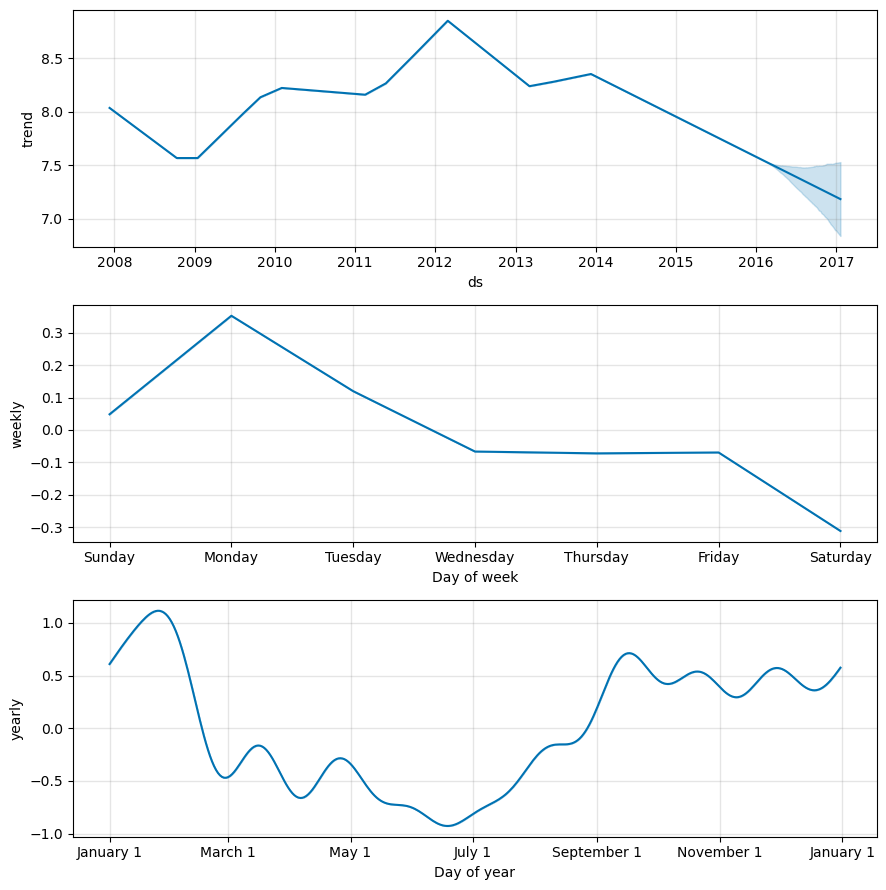

In [19]:
# plotting the trend ... weekly and yearly components of the future dataframe
figure_2 = model.plot_components(future)

# CROSS VALIDATION

In [20]:
from prophet.diagnostics import cross_validation

In [21]:
cv = cross_validation(model, initial='730 days' , period='180 days', horizon='365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

11:16:23 - cmdstanpy - INFO - Chain [1] start processing
11:16:23 - cmdstanpy - INFO - Chain [1] done processing
11:16:24 - cmdstanpy - INFO - Chain [1] start processing
11:16:24 - cmdstanpy - INFO - Chain [1] done processing
11:16:25 - cmdstanpy - INFO - Chain [1] start processing
11:16:25 - cmdstanpy - INFO - Chain [1] done processing
11:16:26 - cmdstanpy - INFO - Chain [1] start processing
11:16:27 - cmdstanpy - INFO - Chain [1] done processing
11:16:27 - cmdstanpy - INFO - Chain [1] start processing
11:16:28 - cmdstanpy - INFO - Chain [1] done processing
11:16:29 - cmdstanpy - INFO - Chain [1] start processing
11:16:29 - cmdstanpy - INFO - Chain [1] done processing
11:16:30 - cmdstanpy - INFO - Chain [1] start processing
11:16:31 - cmdstanpy - INFO - Chain [1] done processing
11:16:31 - cmdstanpy - INFO - Chain [1] start processing
11:16:32 - cmdstanpy - INFO - Chain [1] done processing
11:16:33 - cmdstanpy - INFO - Chain [1] start processing
11:16:34 - cmdstanpy - INFO - Chain [1]

In [22]:
cv.head(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.955733,8.441305,9.432981,8.242493,2010-02-15
1,2010-02-17,8.722134,8.212619,9.219935,8.008033,2010-02-15
2,2010-02-18,8.605869,8.131844,9.093998,8.045268,2010-02-15
3,2010-02-19,8.527697,7.988527,9.022873,7.928766,2010-02-15
4,2010-02-20,8.269636,7.766010,8.738404,7.745003,2010-02-15


# PERFORMANCE METRICS


In [23]:
from prophet.diagnostics import performance_metrics

In [24]:
pm = performance_metrics(cv)

In [25]:
pm.head(5)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493725,0.702655,0.504532,0.058452,0.049965,0.058748,0.676565
1,38 days,0.499510,0.706760,0.509515,0.059029,0.049531,0.059385,0.676565
2,39 days,0.521800,0.722357,0.515632,0.059631,0.049740,0.060112,0.675194
3,40 days,0.529114,0.727402,0.518550,0.059943,0.049452,0.060494,0.676336
4,41 days,0.536587,0.732521,0.519553,0.060023,0.049531,0.060638,0.683874


In [26]:
# visualizing cross validation performance metrics
from prophet.plot import plot_cross_validation_metric

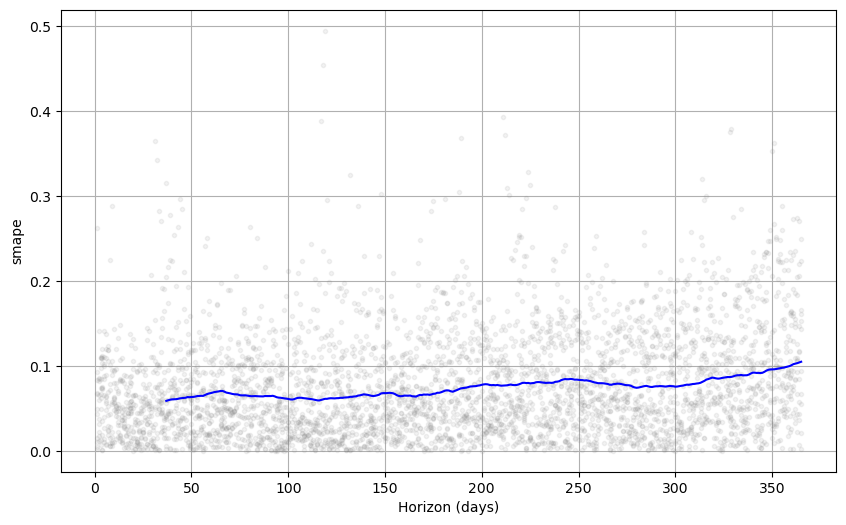

In [27]:
figure_3 = plot_cross_validation_metric(cv , metric='smape')

# HYPERPARAMETER TUNING